<a href="https://colab.research.google.com/github/IgorLytkin/MyDataSpell/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 8-9. Деревья и ансамбли.

## Как нам выбрать оптимальные условия разбиения в деревьях?
Энтропия — это то, как много информации вам не известно о системе.

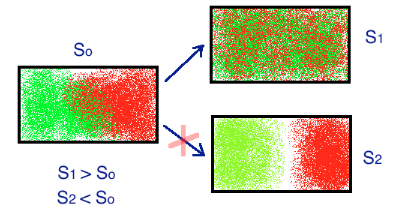

![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)


![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)

In [47]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline


In [48]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [49]:
# view dimensions of dataset

df.shape

(1728, 7)

In [50]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

Мы видим, что в наборе данных нет собственных имен столбцов. Столбцы просто помечены как 0,1,2.... и так далее. Мы должны присвоить столбцам собственные имена. Я сделаю это следующим образом:-

In [51]:
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
col_names = ["покупка", "обслуживание", "двери", "люди", "багажник", "безопасность", "класс"]


df.columns = col_names

col_names

['покупка',
 'обслуживание',
 'двери',
 'люди',
 'багажник',
 'безопасность',
 'класс']

In [52]:
# let's again preview the dataset

df.head()

,покупка,обслуживание,двери,люди,багажник,безопасность,класс
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   покупка       1728 non-null   object
 1   обслуживание  1728 non-null   object
 2   двери         1728 non-null   object
 3   люди          1728 non-null   object
 4   багажник      1728 non-null   object
 5   безопасность  1728 non-null   object
 6   класс         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [54]:
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
col_names = ["покупка", "обслуживание", "двери", "люди", "багажник", "безопасность", "класс"]


for col in col_names:
    print(df[col].value_counts())

покупка
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
обслуживание
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
двери
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
люди
2       576
4       576
more    576
Name: count, dtype: int64
багажник
small    576
med      576
big      576
Name: count, dtype: int64
безопасность
low     576
med     576
high    576
Name: count, dtype: int64
класс
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.
Мы можем видеть, что "двери" и "люди" являются категориальными по своей природе. Итак, я буду рассматривать их как категориальные переменные.

### Summary of variables
### Краткое описание переменных

- There are 7 variables in the dataset. All the variables are of categorical data type.
- В наборе данных 7 переменных. Все переменные относятся к категориальному типу данных.
- 
- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.
- - Они указаны в разделах `покупка`, `обслуживание`, `двери`, `люди`, `багажник`, `безопасность` и `класс`.

- `class` is the target variable.
- `class` - это целевая переменная.

In [55]:
df['класс'].value_counts()

класс
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [56]:
# check missing values in variables
# проверьте пропущенные значения в переменных

df.isnull().sum()

покупка         0
обслуживание    0
двери           0
люди            0
багажник        0
безопасность    0
класс           0
dtype: int64

In [57]:
X = df.drop(['класс'], axis=1)

y = df['класс']

In [58]:
# split X and y into training and testing sets
# разделите X и y на обучающие и тестовые наборы

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [59]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [60]:
# check data types in X_train

X_train.dtypes

покупка         object
обслуживание    object
двери           object
люди            object
багажник        object
безопасность    object
dtype: object

In [61]:
X_train.head()

,покупка,обслуживание,двери,люди,багажник,безопасность
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [62]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

Defaulting to user installation because normal site-packages is not writeable


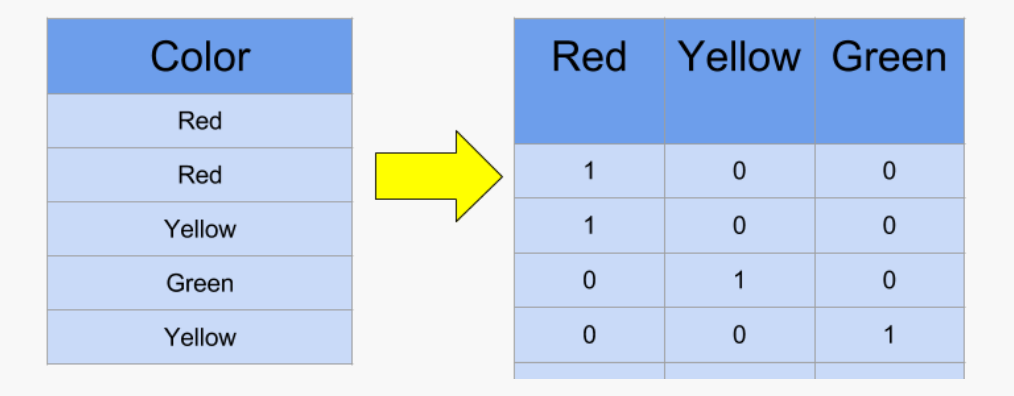

In [63]:
# encode variables with ordinal encoding
# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

#кодируйте переменные с помощью порядковой кодировки
encoder = ce.OrdinalEncoder(cols=["покупка", "обслуживание", "двери", "люди", "багажник", "безопасность"])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [64]:
X_train.head()

,покупка,обслуживание,двери,люди,багажник,безопасность
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [65]:
X_test.head()

,покупка,обслуживание,двери,люди,багажник,безопасность
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [66]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [67]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index
### Прогнозирование результатов набора тестов с использованием критерия индекса Джини

In [68]:
y_pred_gini = clf_gini.predict(X_test)


### Check accuracy score with criterion gini index
### Проверьте оценку точности с помощью критерия индекса Джини

In [69]:
from sklearn.metrics import accuracy_score

# print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Оценка точности модели по критерию индекса Джини: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Оценка точности модели по критерию индекса Джини: 0.8179


In [70]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [71]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8025


In [72]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8025
Test set score: 0.8179


### Visualize decision-trees
### Визуализируйте деревья принятия решений

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'gini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

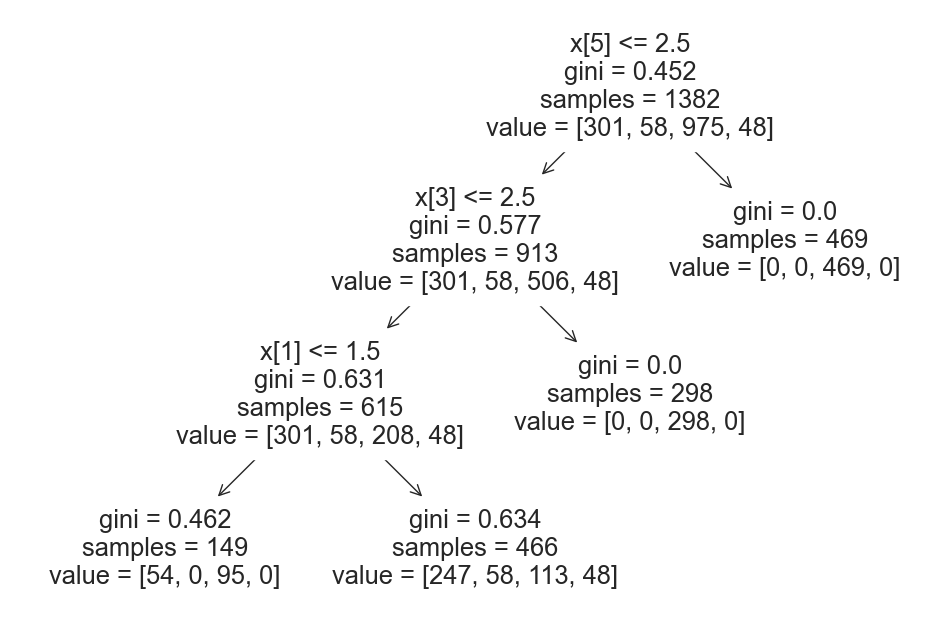

In [73]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

### Visualize decision-trees with graphviz
### Визуализируйте деревья решений с помощью graphviz

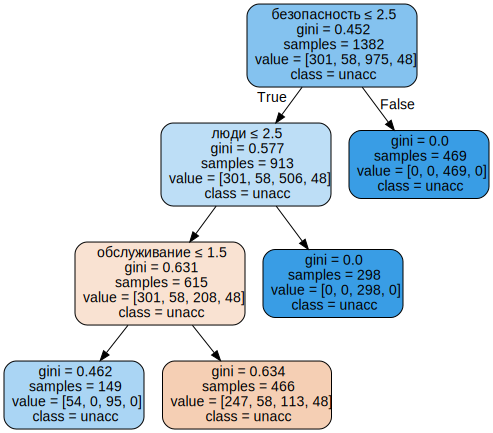

In [74]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [75]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy
### Прогнозирование результатов тестового набора с использованием критерия энтропии 

In [76]:
%%sql


Exception: Data Source is not selected

In [ ]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy
### Проверьте оценку точности с помощью критерия энтропии

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

### Compare the train-set and test-set accuracy
### Сравните точность тренировочного набора и тестового набора


Now, I will compare the train-set and test-set accuracy to check for overfitting.
Теперь я сравню точность тренировочного набора и тестового набора, чтобы проверить, нет ли переобучения.

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

### Check for overfitting and underfitting
### Проверьте, нет ли переобучения и недостаточной подгонки

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

### Visualize decision-trees
### Визуализируйте деревья принятия решений

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

### Visualize decision-trees with graphviz
### Визуализируйте деревья решений с помощью graphviz

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))